In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from main import load_data
from plot_utils.utils import AsinhScaler
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib
import warnings
warnings.filterwarnings('ignore')

font = {'family' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

sns.set_style('whitegrid')

#df, features = load_data('2016_2021')
#df_hourly, features_hourly = load_data('2016_2021_hourly')
#df_hourly.to_csv('Data2.csv', index=False)
#df.to_csv('Data1.csv', index=False)

df = pd.read_csv("Data1.csv")
df_hourly = pd.read_csv('Data2.csv')
df.Time = pd.to_datetime(df.Time)
df_hourly.Time = pd.to_datetime(df_hourly.Time)

In [2]:
from plot_utils.utils import custom_time_series_split
dfh = df[df.Hour == 9].reset_index(drop=True)
list_split = custom_time_series_split(dfh, mode='day', max_train_size=3 * 365)[:365]
list_split_train = custom_time_series_split(dfh, mode='day')

## I) Prices and other features


### Evolutions

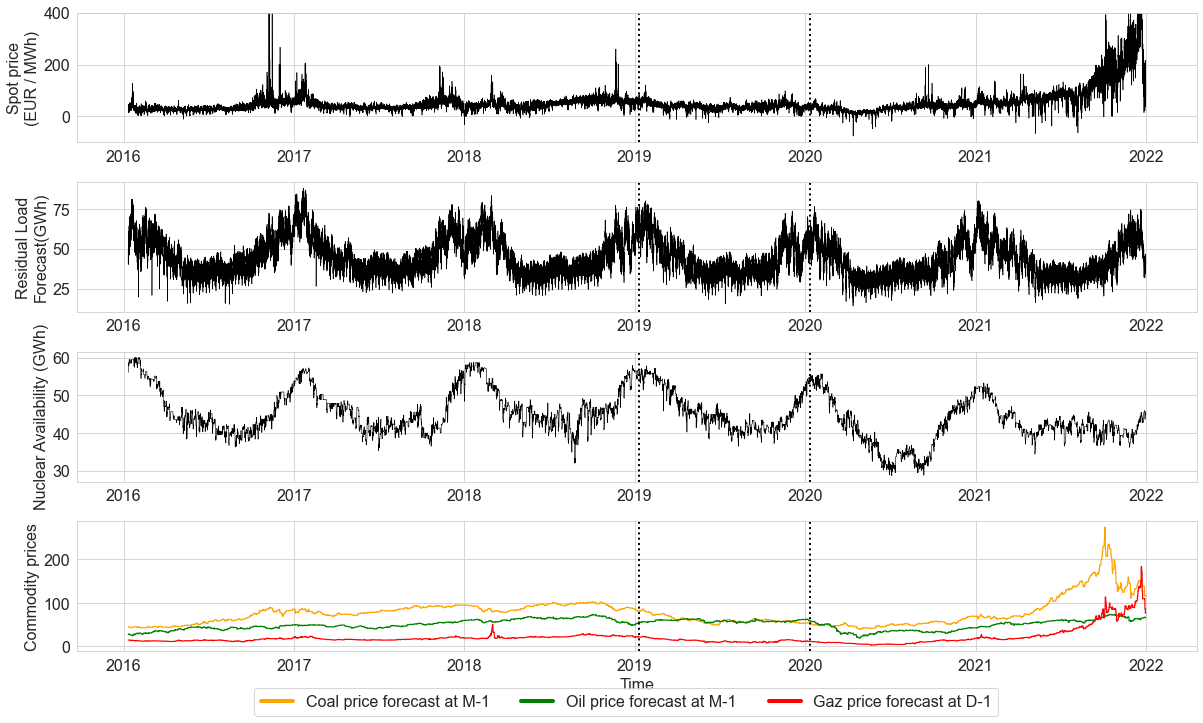

In [3]:
fig, axes = plt.subplots(4)
list_features = ['SpotPrice', 'Prev_Residual_Load', 'Nuclear_availability', ['M1_Coal', 'M1_Oil', 'Lag_J1_GazPrice']]
start_validation = df_hourly[(df_hourly.Date == '2019-01-10') & (df_hourly['Hour']==1)].Time.iloc[0]
end_validation = df_hourly[(df_hourly.Date == '2020-01-11') & (df_hourly['Hour']==1)].Time.iloc[0]
linewidth = 0.6
vlinewidth = 2

# Plot Prices
sns.lineplot(data = df_hourly, x='Time', y='SpotPrice', color='k', linewidth=linewidth, ax=axes[0])

axes[0].set_xlabel('')
axes[0].axvline(start_validation, linestyle = ':', color='k', linewidth = vlinewidth)
axes[0].axvline(end_validation, linestyle = ':', color='k', linewidth = vlinewidth)
#axes[0].axvline(df_hourly[(df_hourly.Date == '2021-09-01') & (df_hourly['Hour']==1)].Time.iloc[0], linestyle = ':', color='k', linewidth = vlinewidth)
axes[0].set_ylabel('Spot price\n(EUR / MWh)')
axes[0].set_ylim((-100, 400))
axes


# Plot Load
sns.lineplot(x=df_hourly['Time'], y=df_hourly['Prev_Residual_Load'] / 1000, color='k', linewidth=linewidth, ax=axes[1])

axes[1].set_xlabel('')
axes[1].axvline(start_validation, linestyle = ':', color='k', linewidth = vlinewidth)
axes[1].axvline(end_validation, linestyle = ':', color='k', linewidth = vlinewidth)
axes[1].set_ylabel('Residual Load\nForecast(GWh)')

# Plot Nuclear availability
sns.lineplot(x=df_hourly['Time'], y=df_hourly['Nuclear_availability'] / 1000, color='k', linewidth=linewidth, ax=axes[2])

axes[2].set_xlabel('')
axes[2].axvline(start_validation, linestyle = ':', color='k', linewidth = vlinewidth)
axes[2].axvline(end_validation, linestyle = ':', color='k', linewidth = vlinewidth)
axes[2].set_ylabel('Nuclear Availability (GWh)')

# Plot commodities
sns.lineplot(x=df_hourly['Time'], y=df_hourly['M1_Coal'], color='orange', linewidth=linewidth*2, ax=axes[3])
sns.lineplot(x=df_hourly['Time'], y=df_hourly['M1_Oil']/ 10, color='green', linewidth=linewidth*2, ax=axes[3])
sns.lineplot(data = df_hourly, x='Time', y='Lag_J1_GazPrice', color='r', linewidth=linewidth*2, ax=axes[3])

axes[3].axvline(start_validation, linestyle = ':', color='k', linewidth = vlinewidth)
axes[3].axvline(end_validation, linestyle = ':', color='k', linewidth = vlinewidth)
#axes[3].axvline(df_hourly[(df_hourly.Date == '2021-09-01') & (df_hourly['Hour']==1)].Time.iloc[0], linestyle = ':', color='k', linewidth = vlinewidth)
axes[3].set_ylabel('Commodity prices')

fig.set_size_inches((17, 10))
fig.tight_layout()

custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='r', lw=4)]

fig.legend(custom_lines, ['Coal price forecast at M-1', 'Oil price forecast at M-1', 'Gaz price forecast at D-1'], loc ='lower center', bbox_to_anchor = (0.52, -0.02), ncol=3)

plt.show()

### Histograms

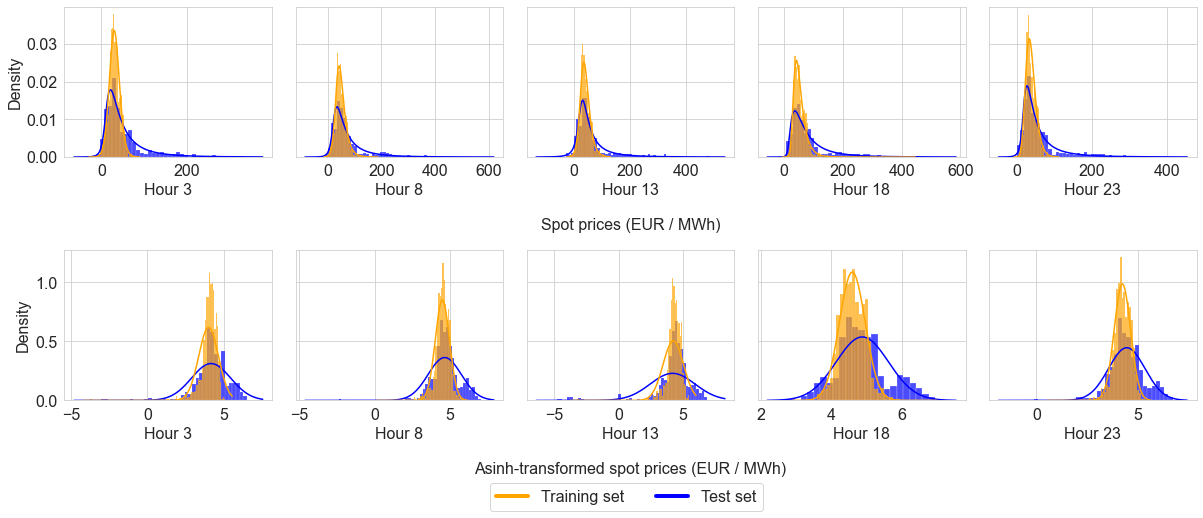

In [4]:
from scipy import stats

fig, axes = plt.subplots(2, 5, sharey='row')
scaler = AsinhScaler()
alpha = 0.7
color_2 = 'blue'
color_1 = 'orange'

## Normal

# Hour 3

sns.histplot(df[(df.Hour == 3) & (df.Time.dt.year >= 2020)].SpotPrice,
             color = color_2, stat='density', alpha=alpha, ax=axes[0,0])

sns.distplot(df[(df.Hour == 3) & (df.Time.dt.year >= 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[0,0],
             norm_hist=True
            )

sns.histplot(df[(df.Hour == 3) & (df.Time.dt.year < 2020)].SpotPrice,
             color=color_1, stat = 'density', alpha=alpha, ax=axes[0,0])

sns.distplot(df[(df.Hour == 3) & (df.Time.dt.year < 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[0,0],
             norm_hist=True
            )

axes[0, 0].set_xlabel('Hour 3')
axes[0, 0].set_ylabel('Density')

# Hour 8
sns.histplot(df[(df.Hour == 8) & (df.Time.dt.year >= 2020)].SpotPrice,
             color = color_2, stat='density', alpha=alpha, ax=axes[0,1])

sns.distplot(df[(df.Hour == 8) & (df.Time.dt.year >= 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[0,1],
             norm_hist=True
            )

sns.histplot(df[(df.Hour == 8) & (df.Time.dt.year < 2020)].SpotPrice,
             color=color_1, stat = 'density', alpha=alpha, ax=axes[0,1])

sns.distplot(df[(df.Hour == 8) & (df.Time.dt.year < 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[0,1],
             norm_hist=True
            )

axes[0, 1].set_xlabel('Hour 8')
axes[0, 1].set_ylabel('')

# Hour 13
sns.histplot(df[(df.Hour == 13) & (df.Time.dt.year >= 2020)].SpotPrice,
             color = color_2, stat='density', alpha=alpha, ax=axes[0,2])

sns.distplot(df[(df.Hour == 13) & (df.Time.dt.year >= 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[0,2],
             norm_hist=True
            )

sns.histplot(df[(df.Hour == 13) & (df.Time.dt.year < 2020)].SpotPrice,
             color=color_1, stat = 'density', alpha=alpha, ax=axes[0,2])

sns.distplot(df[(df.Hour == 13) & (df.Time.dt.year < 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[0,2],
             norm_hist=True
            )

axes[0, 2].set_xlabel('Hour 13\n \nSpot prices (EUR / MWh)')
axes[0, 2].set_ylabel('')

# Hour 18
sns.histplot(df[(df.Hour == 18) & (df.Time.dt.year >= 2020)].SpotPrice,
             color = color_2, stat='density', alpha=alpha, ax=axes[0,3])

sns.distplot(df[(df.Hour == 18) & (df.Time.dt.year >= 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[0,3],
             norm_hist=True
            )

sns.histplot(df[(df.Hour == 18) & (df.Time.dt.year < 2020)].SpotPrice,
             color=color_1, stat = 'density', alpha=alpha, ax=axes[0,3])

sns.distplot(df[(df.Hour == 18) & (df.Time.dt.year < 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[0,3],
             norm_hist=True
            )

axes[0, 3].set_xlabel('Hour 18')
axes[0, 3].set_ylabel('')

# Hour 23
sns.histplot(df[(df.Hour == 23) & (df.Time.dt.year >= 2020)].SpotPrice,
             color = color_2, stat='density', alpha=alpha, ax=axes[0,4])

sns.distplot(df[(df.Hour == 23) & (df.Time.dt.year >= 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[0,4],
             norm_hist=True
            )

sns.histplot(df[(df.Hour == 23) & (df.Time.dt.year < 2020)].SpotPrice,
             color=color_1, stat = 'density', alpha=alpha, ax=axes[0,4])

sns.distplot(df[(df.Hour == 23) & (df.Time.dt.year < 2020)].SpotPrice,
             hist=False, kde=False, fit = stats.johnsonsu,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[0,4],
             norm_hist=True
            )

axes[0, 4].set_xlabel('Hour 23')
axes[0, 4].set_ylabel('')

## After Asinh tranform :
# Hour 3

sns.histplot(scaler.transform(df[(df.Hour == 3) & (df.Time.dt.year >= 2020)].SpotPrice),
             color = color_2, stat='density', alpha=alpha, ax=axes[1,0])

sns.distplot(scaler.transform(df[(df.Hour == 3) & (df.Time.dt.year >= 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[1,0],
             norm_hist=True
            )

sns.histplot(scaler.transform(df[(df.Hour == 3) & (df.Time.dt.year < 2020)].SpotPrice),
             color=color_1, stat = 'density', alpha=alpha, ax=axes[1,0])

sns.distplot(scaler.transform(df[(df.Hour == 3) & (df.Time.dt.year < 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[1,0],
             norm_hist=True
            )

axes[1, 0].set_xlabel('Hour 3')
axes[1, 0].set_ylabel('Density')

# Hour 8
sns.histplot(scaler.transform(df[(df.Hour == 8) & (df.Time.dt.year >= 2020)].SpotPrice),
             color = color_2, stat='density', alpha=alpha, ax=axes[1,1])

sns.distplot(scaler.transform(df[(df.Hour == 8) & (df.Time.dt.year >= 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[1,1],
             norm_hist=True
            )

sns.histplot(scaler.transform(df[(df.Hour == 8) & (df.Time.dt.year < 2020)].SpotPrice),
             color=color_1, stat = 'density', alpha=alpha, ax=axes[1,1])

sns.distplot(scaler.transform(df[(df.Hour == 8) & (df.Time.dt.year < 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[1,1],
             norm_hist=True
            )

axes[1, 1].set_xlabel('Hour 8')
axes[1, 1].set_ylabel('')

# Hour 13
sns.histplot(scaler.transform(df[(df.Hour == 13) & (df.Time.dt.year >= 2020)].SpotPrice),
             color = color_2, stat='density', alpha=alpha, ax=axes[1,2])

sns.distplot(scaler.transform(df[(df.Hour == 13) & (df.Time.dt.year >= 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[1,2],
             norm_hist=True
            )

sns.histplot(scaler.transform(df[(df.Hour == 13) & (df.Time.dt.year < 2020)].SpotPrice),
             color=color_1, stat = 'density', alpha=alpha, ax=axes[1,2])

sns.distplot(scaler.transform(df[(df.Hour == 13) & (df.Time.dt.year < 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[1,2],
             norm_hist=True
            )

axes[1, 2].set_xlabel('Hour 13\n \nAsinh-transformed spot prices (EUR / MWh)')
axes[1, 2].set_ylabel('')

# Hour 18
sns.histplot(scaler.transform(df[(df.Hour == 18) & (df.Time.dt.year >= 2020)].SpotPrice),
             color = color_2, stat='density', alpha=alpha, ax=axes[1,3])

sns.distplot(scaler.transform(df[(df.Hour == 18) & (df.Time.dt.year >= 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[1,3],
             norm_hist=True
            )

sns.histplot(scaler.transform(df[(df.Hour == 18) & (df.Time.dt.year < 2020)].SpotPrice),
             color=color_1, stat = 'density', alpha=alpha, ax=axes[1,3])

sns.distplot(scaler.transform(df[(df.Hour == 18) & (df.Time.dt.year < 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[1,3],
             norm_hist=True
            )

axes[1, 3].set_xlabel('Hour 18')
axes[1, 3].set_ylabel('')

# Hour 23
sns.histplot(scaler.transform(df[(df.Hour == 23) & (df.Time.dt.year >= 2020)].SpotPrice),
             color = color_2, stat='density', alpha=alpha, ax=axes[1,4])

sns.distplot(scaler.transform(df[(df.Hour == 23) & (df.Time.dt.year >= 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_2}, ax=axes[1,4],
             norm_hist=True
            )

sns.histplot(scaler.transform(df[(df.Hour == 23) & (df.Time.dt.year < 2020)].SpotPrice),
             color=color_1, stat = 'density', alpha=alpha, ax=axes[1,4])

sns.distplot(scaler.transform(df[(df.Hour == 23) & (df.Time.dt.year < 2020)].SpotPrice),
             hist=False, kde=False, fit = stats.norm,
             fit_kws = {'alpha' : 1, 'color' : color_1}, ax=axes[1,4],
             norm_hist=True
            )

axes[1, 4].set_xlabel('Hour 23')
axes[1, 4].set_ylabel('')
fig.set_size_inches((17, 7))
fig.tight_layout()

# Legend
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4)]

fig.legend(custom_lines, ['Training set', 'Test set'], loc ='lower center', bbox_to_anchor = (0.52, -0.05), ncol=2)

plt.show()

## II) Mean estimation performances 

In [5]:
from plot_utils.utils import DIC, PALETTE_DIC
#from models.evaluate import format_results, reorder_quantiles, evaluate_mean_prediction
#LIST_FILE_FI = [f'/Users/user/Documents/Archive Grégoire/greg stage/results/mreg_fi/{v}_2507.csv' for v in ['lasso_cv', 'lasso1', 'qrf', 'xgbtree']]
#LIST_FILE_PREPROC = [f'/Users/user/Documents/Archive Grégoire/greg stage/results/mreg/{v}.csv' for v in ['lassocv_preproc_0808', 'mreg_lasso_preproc_0808', 'xgblin_0408_preproc', 'rf_0408_preproc']]
#LIST_FILE = [f'/Users/user/Documents/Archive Grégoire/greg stage/results/mreg/{v}.csv' for v in ['lasso_cv_0607_test']]
#LIST_COMP_2019 = [f'/Users/user/Documents/Archive Grégoire/greg stage/results/mreg/{v}.csv' for v in ['lassocv_preproc_2019_0808', 'lassocv_2019_0808']]

#DIC_NAME_MODEL = {
#    'LassoCV'  : 'LassoCV',
#    'Lasso_alpha_1' : 'Lasso ($\\alpha = 1$)',
#    'RandomForestRegressor' : 'Random Forest',
#    'XGBRegressor_linear_' : 'XGBRegressor (linear)',
#    'XGBRegressor_trees' : 'XGBRegressor (trees)'
#}
import os

### 1) Global performances

In [15]:
#df = pd.DataFrame()
#for i, file in enumerate(LIST_FILE_PREPROC):
#    df_ = pd.read_csv(file)
#    df_['model_type'] = DIC_NAME_MODEL[df_['model'].str.split('PER')[0][0]]
#    df_['PER'] = df_['model'].str.split('PER').apply(lambda x : x[1])
#    df = df.append(df_).reset_index(drop=True)

#for file in LIST_FILE:
#    df_ = pd.read_csv(file)
#    df_['model_type'] = DIC_NAME_MODEL[df_['model'].str.split('PER')[0][0]] + ' (no scaling)'
#    df_['PER'] = df_['model'].str.split('PER').apply(lambda x : x[1])
#    df = df.append(df_).reset_index(drop=True)

#df.loc[df.SpotPrice_pred > 3000, 'SpotPrice_pred'] = 3000
#df.loc[df.SpotPrice_pred < -500, 'SpotPrice_pred'] = -500

#dfe = evaluate_mean_prediction(df.rename(columns={'training_time' : 'time'}), start = '2020-01-11', end='2021-12-31').reset_index()
#dfe.to_csv('Data3.csv', index=False)
dfe = pd.read_csv('Data3.csv')
dfp = pd.pivot(dfe.reset_index(), index = ['model_type', 'PER'], values = ['rmse', 'mae', 'rmae', 'time'], columns = ['year'])
#dfp = dfp.set_index(['model_type', 'PER'])
print(np.round(dfp, 2).to_latex())

\begin{tabular}{llrrrrrrrr}
\toprule
                      & {} & \multicolumn{2}{l}{rmse} & \multicolumn{2}{l}{mae} & \multicolumn{2}{l}{rmae} & \multicolumn{2}{l}{time} \\
                      & year &   2020 &    2021 &  2020 &    2021 &  2020 &  2021 &  2020 &  2021 \\
model\_type & PER &        &         &       &         &       &       &       &       \\
\midrule
Lasso (\$\textbackslash alpha = 1\$) & 1080 &   8.78 &  259.51 &  4.88 &   86.12 &  0.28 &  4.90 &  0.63 &  0.57 \\
                      & 180 &  13.47 &  157.60 &  4.78 &   45.83 &  0.27 &  2.61 &  0.13 &  0.26 \\
                      & 270 &  10.79 &  159.91 &  4.64 &   46.30 &  0.26 &  2.64 &  0.16 &  0.33 \\
                      & 360 &   9.47 &  157.22 &  4.49 &   48.34 &  0.26 &  2.75 &  0.20 &  0.35 \\
                      & 720 &   7.93 &  202.79 &  4.58 &   66.07 &  0.26 &  3.76 &  0.43 &  0.47 \\
                      & 90 &  19.27 &  157.84 &  5.08 &   40.75 &  0.29 &  2.32 &  0.05 &  0.09 \\
           

### 2) Scaling vs non scaling on 2019 ...

In [17]:
#df1 = pd.DataFrame()
#for i, file in enumerate(LIST_COMP_2019):
#    df_ = pd.read_csv(file)
#    df_['model_type'] = DIC_NAME_MODEL[df_['model'].str.split('PER')[0][0]]
#    if 'preproc' in file:
#        df_['model_type'] += ' (with scaling)'
#    df_['PER'] = df_['model'].str.split('PER').apply(lambda x : x[1])
#    df1 = df1.append(df_).reset_index(drop=True)

#dfe2 = evaluate_mean_prediction(df1.rename(columns={'training_time' : 'time'}), start = '2019-01-01', end='2019-12-31')[['rmse', 'mae', 'rmae', 'time']]
#dfe2.to_csv('Data4.csv', index=True)
dfe2 = pd.read_csv('Data4.csv')
print(np.round(dfe2, 2).to_latex())

\begin{tabular}{lllrrrrr}
\toprule
{} &              model\_type &   PER &  year &   rmse &   mae &  rmae &  time \\
\midrule
0  &                 LassoCV &    90 &  2019 &   6.02 &  4.37 &  0.55 &  3.36 \\
1  &                 LassoCV &   180 &  2019 &   5.73 &  4.23 &  0.54 &  4.53 \\
2  &                 LassoCV &   270 &  2019 &   5.71 &  4.25 &  0.54 &  3.43 \\
3  &                 LassoCV &   360 &  2019 &   5.60 &  4.17 &  0.53 &  4.10 \\
4  &                 LassoCV &   720 &  2019 &   5.36 &  4.01 &  0.51 &  3.92 \\
5  &                 LassoCV &  1080 &  2019 &   5.52 &  4.14 &  0.52 &  4.25 \\
6  &                 LassoCV &  None &  2019 &   5.59 &  4.16 &  0.53 &  3.42 \\
7  &  LassoCV (with scaling) &    90 &  2019 &  45.61 &  5.01 &  0.63 &  3.18 \\
8  &  LassoCV (with scaling) &   180 &  2019 &   5.96 &  4.24 &  0.54 &  3.90 \\
9  &  LassoCV (with scaling) &   270 &  2019 &   6.06 &  4.30 &  0.54 &  2.88 \\
10 &  LassoCV (with scaling) &   360 &  2019 &   6.01 &  4.25 & 

#### b) Predictions plot for test set

Text(0, 0.5, 'Spot price\n(EUR / MWh)')

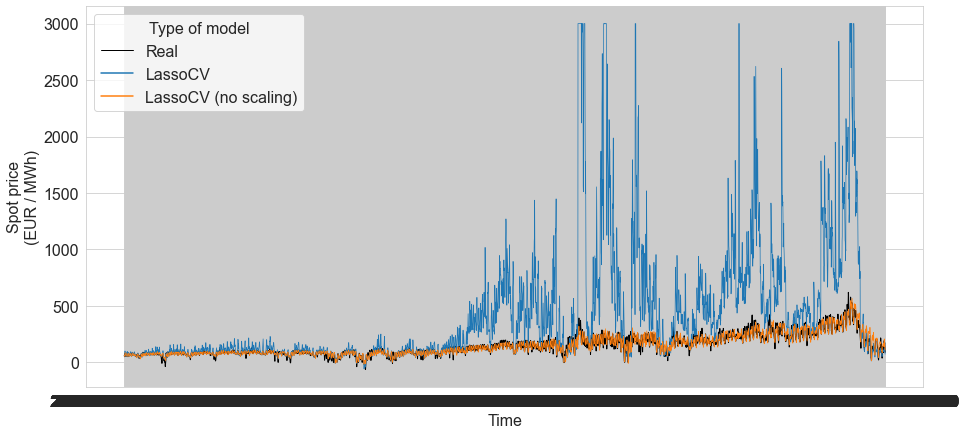

In [19]:
#df['Time'] = pd.to_datetime(df.Date + "-" + df.Hour.astype(str), format="%Y-%m-%d-%H")
#df.to_csv('Data5.csv', index=False)
df = pd.read_csv('Data5.csv')

plt.figure(figsize =(15, 7))

sns.lineplot(data= df[(df.PER == 'None') & (df.model_type.isin(['LassoCV'])) & (df.Date > '2021-06-01')],
            x = 'Time',
            y = 'SpotPrice',
            color='k',
            linewidth = 1, label='Real')
sns.lineplot(data = df[(df.PER == 'None') & (df.model_type.isin(['LassoCV', 'LassoCV (no scaling)'])) & (df.Date > '2021-06-01')],
             x = 'Time',
             y = 'SpotPrice_pred',
             hue='model_type',
             linewidth=0.7)

plt.legend(title='Type of model')
plt.ylabel('Spot price\n(EUR / MWh)')


## III) Feature importances

In [20]:
#df = pd.DataFrame()
#for i, file in enumerate(LIST_FILE_FI):
#    df_ = pd.read_csv(file)
#    df_['model_type'] = DIC_NAME_MODEL[df_['model'].str.split('PER')[0][0]]
#    df_ = df_[df_.model.str[-4:] == 'None']
#    df_['feature_cat'] = df_.feature.map(DIC)
#    df_['abs_importance'] = np.abs(df_['importance'])
#    df = df.append(df_).reset_index(drop=True)



### 1) FI for each model


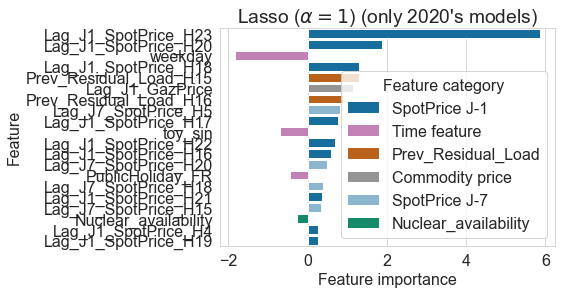

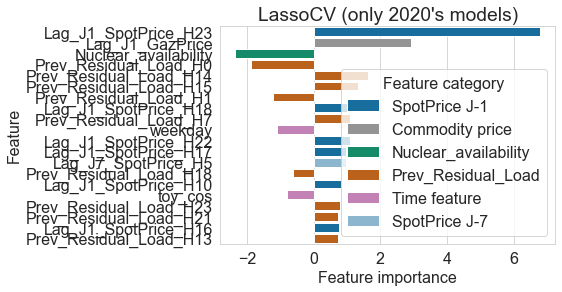

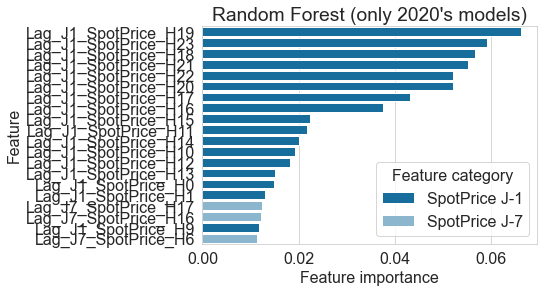

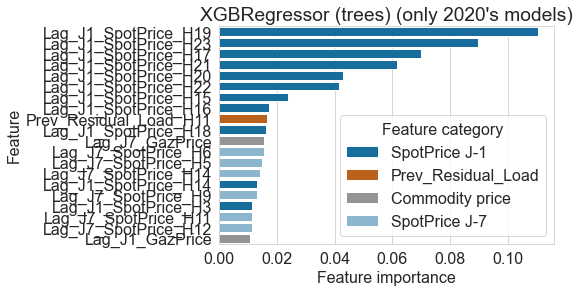

In [22]:
#dfg = df[df.Date < '2022-01-01'].groupby(['feature', 'feature_cat', 'model_type'])[['abs_importance', 'importance']].aggregate(['mean', 'std']).reset_index()
#dfg.columns = ['feature', 'feature_cat', 'model_type', 'abs_importance_mean', 'abs_importance_std', 'importance_mean', 'importance_std']
dfg.to_csv('Data6.csv', index=False)
dfg = pd.read_csv('Data6.csv')

for model in dfg.model_type.unique():
    dfg_ = dfg[dfg.model_type == model]
    plt.figure(figsize=(6, 4))
    sns.barplot(data=dfg_.sort_values(by='abs_importance_mean', ascending=False).head(20), x='importance_mean', y='feature', hue='feature_cat', dodge=False, palette = PALETTE_DIC)
    plt.title(f"{model} (only 2020's models)")
    plt.legend(title='Feature category')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

### 2) Evolving FIs

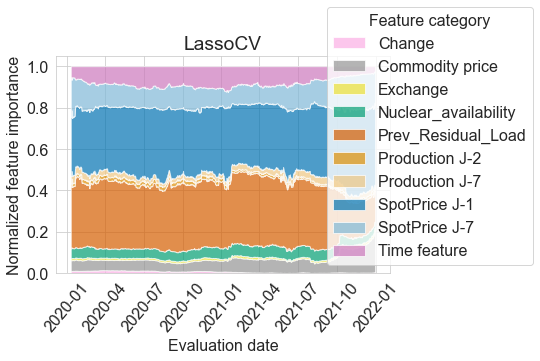

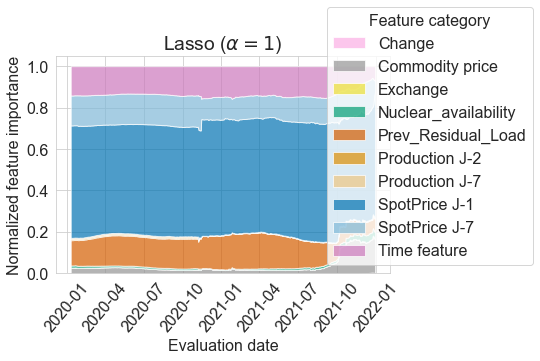

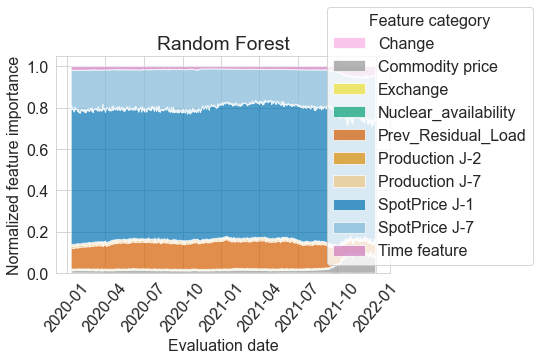

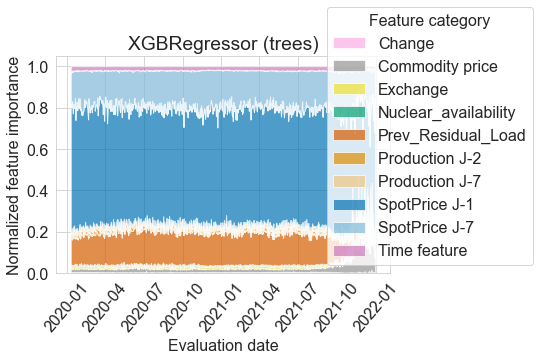

In [24]:
#dfg = df.groupby(['Date', 'feature', 'feature_cat', 'model']).importance.mean().reset_index()
#dfg['abs_importance'] = np.abs(dfg['importance'])
#dfg = dfg.groupby(['Date', 'feature_cat', 'model']).abs_importance.sum().reset_index()

#dfg = df.groupby(['Date', 'feature', 'feature_cat', 'model']).importance.mean().reset_index()
#dfg['abs_importance'] = np.abs(dfg['importance'])
#dfg = dfg.groupby(['Date', 'feature_cat', 'model']).abs_importance.sum().reset_index()
#df_norm = pd.DataFrame(dfg.groupby(['model', 'Date']).abs_importance.sum()).reset_index()
#df_norm.columns = ['model', 'Date', 'norm']
#dfg = pd.merge(dfg, df_norm, on=['model', 'Date'], how='left')
#dfg['abs_importance'] /= dfg['norm']

dfg.to_csv('Data7.csv', index=False)
dfg = pd.read_csv('Data7.csv')

for model in dfg.model.unique():
    model = model.split('PER')[0]
    dfg_ = dfg[dfg.model == model + 'PERNone']
    dfg_.Date = pd.to_datetime(dfg_.Date)
    dfg_['cum_density'] = dfg_.sort_values(by=['Date', 'feature_cat']).abs_importance.cumsum() - np.repeat(np.arange(722), 10)
    plt.stackplot(dfg_.Date.unique(),
                  [dfg_[dfg_.feature_cat == feature_cat].abs_importance for feature_cat in dfg_.feature_cat.unique()],
                  labels=dfg_.feature_cat.unique(),
                  alpha=0.7,
                  colors = [PALETTE_DIC[feature] for feature in dfg_.feature_cat.unique()]
                 )
    
    #ax = sns.lineplot(data = dfg_, x='Date', y='cum_density', hue='feature_cat', palette=PALETTE_DIC)
    plt.xticks(rotation=50)
    plt.title(f"{DIC_NAME_MODEL[model]}")
    plt.xlabel('Evaluation date')
    plt.ylabel('Normalized feature importance')
    plt.ylim([0,1.05])
    plt.legend(title='Feature category', loc = 'lower right', bbox_to_anchor =(1.45, 0))
    plt.show()